# Data


## Importing and parsing data


In [27]:
%load_ext autoreload
%autoreload 2

# ML libraries 
from sklearn.cluster import KMeans
from sklearn.neighbors.kde import KernelDensity

# Computation & Signal Processing
from scipy import signal
import numpy as np
import pandas as pd
import pylab as pl
import pickle
import scipy.io as spio

#biosppy package for ecg signal analysis
from biosppy import storage
from biosppy.signals import ecg

matlabEMG = spio.loadmat('302_p1_EMG_datamatlab.mat', squeeze_me=True)



# Plotting
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.io as pio

plotly.offline.init_notebook_mode(connected=True)
%matplotlib widget
import sys
sys.path.append('path/to/file')
from utils import * #import data import, clean up and sampling functions. 
# import time
import time 
# import sys
# sys.path.append('path/to/file')
import ECG_feature_extractor_1000 as extractor
# fs: sampling frequency
# df: reading a csv file and store it in panads dataframe (http://pandas.pydata.org/pandas-docs/stable/)

start = time.time()
fs_acc = 148.148 #actual 148.15 
fs_emg = 1925.9258 #from 1/df['X[s]'][1] 
fs_ecg = 1925.9258

gdrive = True
data_dir = 'csv'

# Specifiying directory
#file = data_dir*gdrive + '/OA_2019_302_P1_Rep_1.3.csv'
#file2 = data_dir*gdrive + '/OA_2019_302_NW2_Rep_1.5.csv'
#file3 = data_dir*gdrive + '/OA_2019_302_P1_Rep_1.3.csv'
#file4 = data_dir*gdrive + '/OA_2019_302_P2_Rep_1.4.csv'

# loading and parsing data
df = load_data('/OA_2019_302_NW1_Rep_1.2.csv', data_dir )
df2 = load_data('/OA_2019_302_NW2_Rep_1.5.csv', data_dir)
df3 = load_data('/OA_2019_302_P1_Rep_1.3.csv', data_dir)
df4 = load_data('/OA_2019_302_P2_Rep_1.4.csv', data_dir)



# data clean up and assignment
nw1 = delsys_cleanup(df)
nw2 = delsys_cleanup(df2)
p1 = delsys_cleanup(df3)
p2 = delsys_cleanup(df4)

end = time.time()
print(f'data loading + clean up cost = {end-start}s')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'load_data' is not defined

In [2]:
delsys_cleanup?

Signature: delsys_cleanup(df, column='L PECTORALIS MAJOR: EKG 16')
Docstring: this function cleans up data that is coming from the delsys system
File:      c:\users\alkurdi\google drive\school\uiuc\research\hsiao-wecksler\m3x project proposal and reviews\anxiety_detection\utils.py
Type:      function


In [3]:
data_dir_treadmill = 'Treadmill data_trial1-4'
file3_clientinfo = 'OA_302_P1_CLIENTINFO'
file3_cueing = 'OA_302_N1_CUEING'
file3_gaitcycles = 'OA_201_N1_GAITCYCLES'
file3_rawdata = '/OA_302_P1_RAWDATA.csv'

treadmill_data = load_data(file3_rawdata, data_dir_treadmill)

data_dir_fNIRS = 'fNIRS'
file3_fNIRS = '/OA_FNIRS_2019_WALK_306_oxydata.txt'
fNIRS = pd.read_csv(data_dir_fNIRS+file3_fNIRS,sep='\t')

In [4]:
matlabEMG.keys()


dict_keys(['__header__', '__version__', '__globals__', 'data', 'data_acc', 'data_acc_time', 'data_new', 'data_time'])

plt.plot(nw1_resampled.ecg)
plt.title('resampled ecg')
plt.figure()
plt.plot(nw1['ecg'])
plt.title('raw ecg')

## Algar3awi's



In [5]:
#(nw2.time[2000]-nw2.time[0]).components


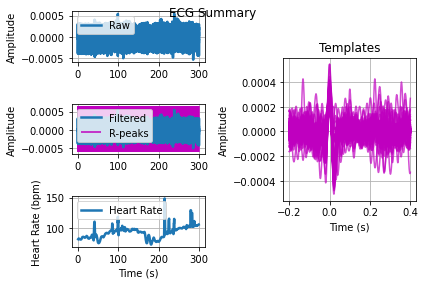

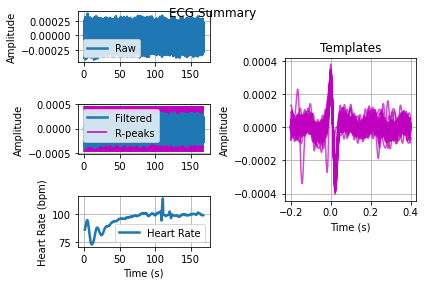

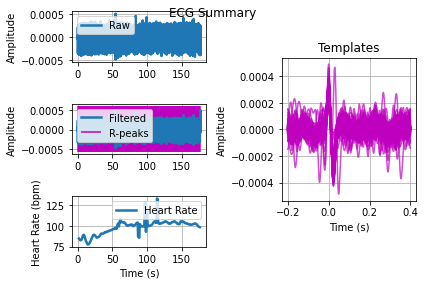

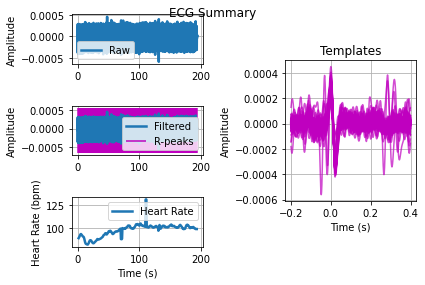

cost= 13.62709379196167s


In [6]:

%matplotlib inline
'''
signal, mdata = storage.load_txt(file)
Fs = mdata['sampling_rate']
N = len(signal)  # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, signal, lw=2)
'''
RR_bank, pack_bank, ecg_out_bank = [], [], []
start = time.time()


BS_signal_analysis = ecg.ecg(signal=nw1.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis2 = ecg.ecg(signal=nw2.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis3 = ecg.ecg(signal=p1.ecg, sampling_rate=fs_ecg, show=True)
BS_signal_analysis4 = ecg.ecg(signal=p2.ecg, sampling_rate=fs_ecg, show=True)

pack,  ecg_out  = freq_ratio_hybrid(nw1.ecg, fs=fs_ecg, RR=BS_signal_analysis['rpeaks'], method = 'periodogram', factor = 1)
pack2, ecg_out2 = freq_ratio_hybrid(nw2.ecg, fs=fs_ecg, RR=BS_signal_analysis2['rpeaks'], method = 'periodogram', factor = 1)
pack3, ecg_out3 = freq_ratio_hybrid(p1.ecg, fs=fs_ecg, RR=BS_signal_analysis3['rpeaks'], method = 'periodogram', factor = 1)
pack4, ecg_out4 = freq_ratio_hybrid(p2.ecg, fs=fs_ecg, RR=BS_signal_analysis4['rpeaks'], method = 'periodogram', factor = 1)


end = time.time()

print(f'cost= {end-start}s')




In [7]:
type(pd.to_datetime(p2.time))

pandas.core.series.Series

In [8]:
pd.to_datetime(p2.time)

0        1970-01-01 00:00:00.000000000
1        1970-01-01 00:00:00.000000000
2        1970-01-01 00:00:00.000000000
3        1970-01-01 00:00:00.000000000
4        1970-01-01 00:00:00.000000000
                      ...             
374160   1970-01-01 00:00:00.000000194
374161   1970-01-01 00:00:00.000000194
374162   1970-01-01 00:00:00.000000194
374163   1970-01-01 00:00:00.000000194
374164   1970-01-01 00:00:00.000000194
Name: time, Length: 374165, dtype: datetime64[ns]

In [9]:
n302 = {'p1':p1, 'p2':p2, 'nw1':nw1, 'nw2':nw2}
cohort = {'302':n302}
cohort['302']['p1'].fs = fs_ecg
interval_length = 30 # 30 seconds
interval_index_span = cohort['302']['p1'].fs * interval_length # for a 30 second interval


In [10]:
cohort['302']['p1'].fs

1925.9258

In [11]:
# i want to create the loop here
cohort['302']['p1'].shape[0]/interval_index_span
np.round(cohort['302']['p1'].shape[0]/interval_index_span)

6.0

In [12]:
stride=5 #5 second strides
stride_length_i = np.int( stride*cohort['302']['p1'].fs)
print(f'stride length {stride_length_i}')

interval_length = 30 #30 seconds is the interval window for each datapoint. 
interval_length_i = np.int(interval_length*cohort['302']['p1'].fs)
print(f'interval length {interval_length_i}')


stride length 9629
interval length 57777


In [13]:
cohort['302']['p1'].shape[0]

340184

In [14]:
total_interval_over_strides = np.int(cohort['302']['p1'].shape[0] // stride_length_i)
f'{total_interval_over_strides}'

'35'

In [15]:
lfhf_metric = []
sdnn_metric = []
pack = []
ecg_out = []
intervals = [None]*(total_interval_over_strides-14)
for i in range(total_interval_over_strides-14):
    intervals[i] = [i*stride_length_i, (i)*stride_length_i+interval_length_i]        

print(intervals)
print(len(intervals))

[[0, 57777], [9629, 67406], [19258, 77035], [28887, 86664], [38516, 96293], [48145, 105922], [57774, 115551], [67403, 125180], [77032, 134809], [86661, 144438], [96290, 154067], [105919, 163696], [115548, 173325], [125177, 182954], [134806, 192583], [144435, 202212], [154064, 211841], [163693, 221470], [173322, 231099], [182951, 240728], [192580, 250357]]
21


In [32]:
BS_signal_analysis['rpeaks']

array([  568,  1731,  2876,  3396,  4033,  5187,  6329,  7836,  8628,
        9782, 10938, 12102, 13269, 14431, 15580, 16741, 17893, 19041,
       20196, 21345, 22489, 23625, 24762, 25883, 26987, 28099, 29204,
       30296, 31394, 32507, 33623, 34747, 35856, 36964, 37575, 38090,
       39222, 40339, 41461, 42592, 43721, 44847, 45979, 47102, 48227,
       49347, 50471, 51585, 52706, 53819, 54922, 56038])

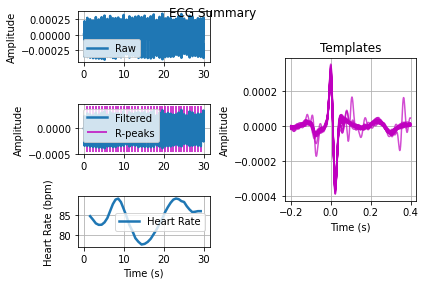

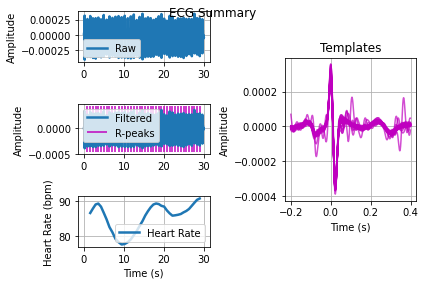

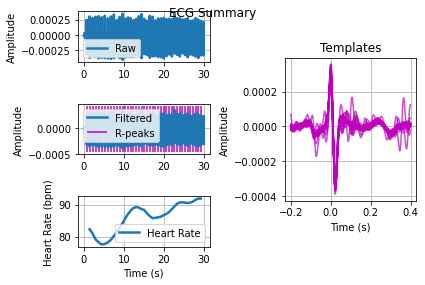

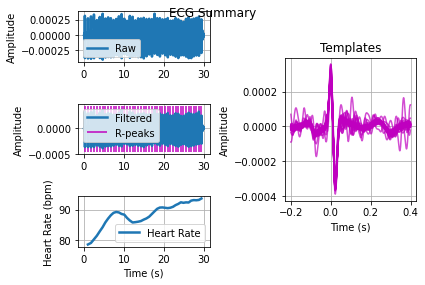

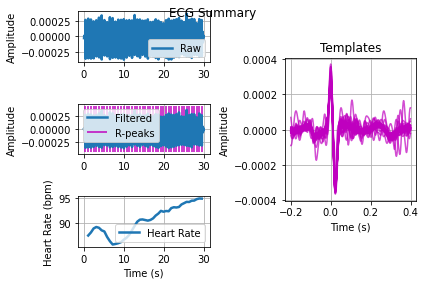

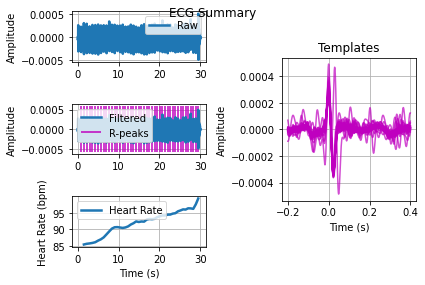

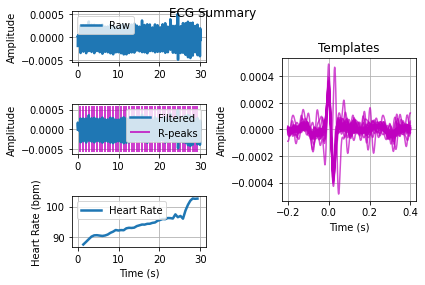

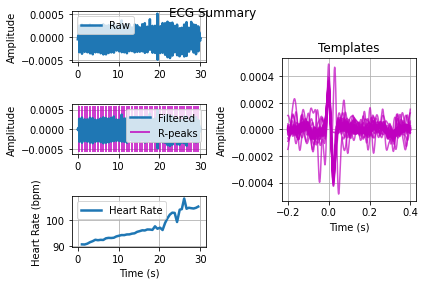

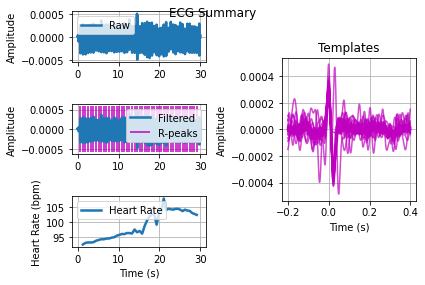

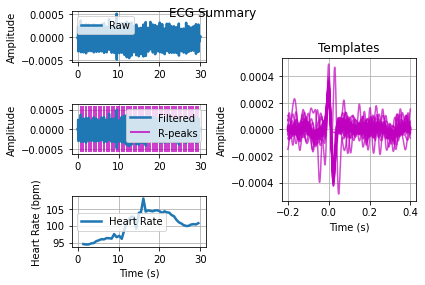

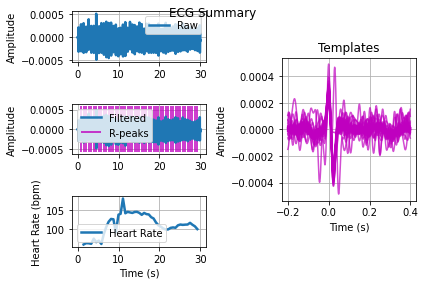

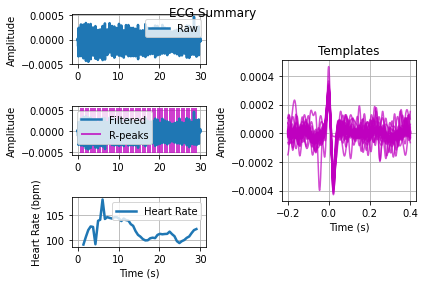

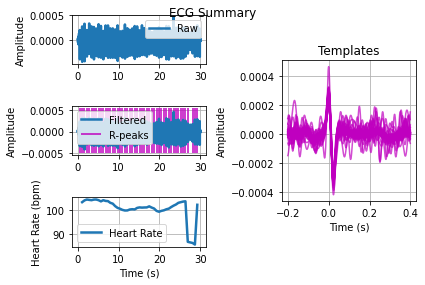

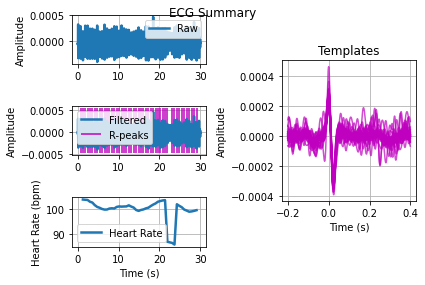

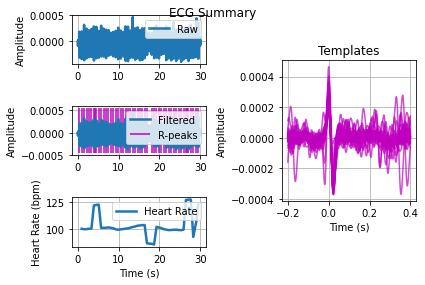

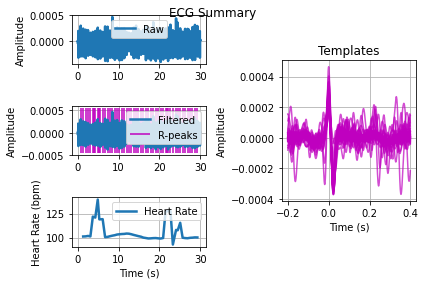

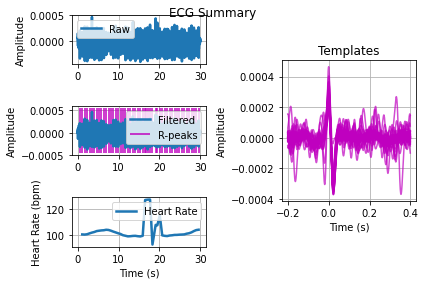

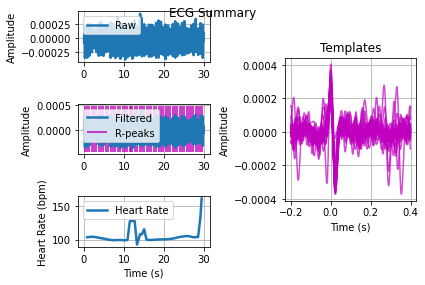

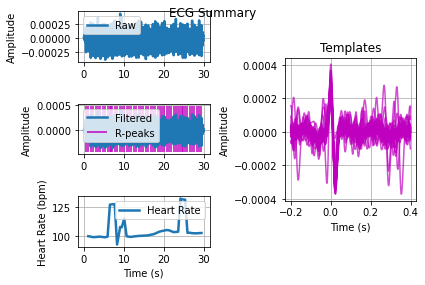

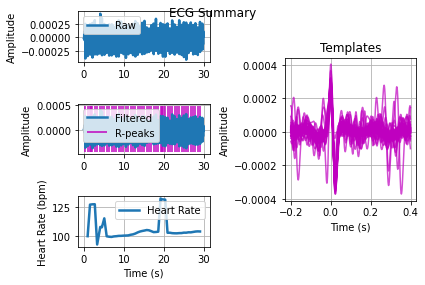

In [16]:
segments = []
RR_store = []
for idx, val in enumerate(intervals[:-1]):
    current_segment = cohort['302']['p1'][val[0]:val[1]].ecg
    fs = cohort['302']['p1'].fs
    
    BS_signal_analysis = ecg.ecg(signal=current_segment, sampling_rate=fs, show=True)
    RR = BS_signal_analysis['rpeaks']
    RR_store.append(RR)
    A, B = freq_ratio_hybrid(current_segment, fs=fs, RR=BS_signal_analysis['rpeaks'], method = 'periodogram', factor = 1)
    pack.append(A)
    ecg_out.append(B)
    plt.close()


In [69]:
lf_hf_store = []
#  standard deviation of the IBI of normal sinus beats
sdnn_store = []



for entry in pack:
    lf_hf_store.append(entry['lf_hf'])

for entry in RR_store:
    ibi = np.diff(entry)
    sdnn = np.std(entry)
    sdnn_store.append(sdnn)
sdnn_store = [i/fs for i in sdnn_store]

In [36]:
## clustering algorithm


In [19]:
len(lf_hf_store)

20

In [76]:
%matplotlib widget
num_figures = 5
i = 1
plt.figure()
plt.subplots_adjust( wspace = 1., hspace = 1.)
plt.subplot(num_figures,1,i)
plt.title('Treadmill Speed')
plt.xlabel('time (s)')
plt.plot(treadmill_data.Time, treadmill_data.Speed)
plt.xlim(0,100)
i+=1   

plt.subplot(num_figures,1,i)
plt.title('LF/HF')
scale = [15+i[0]/1910 for i in intervals[0:-1]]
#plt.plot(lf_hf_store,'*')
plt.xlabel('time (s)')
plt.plot(scale, lf_hf_store,'*')
plt.xlim(0,100)
i+=1

plt.subplot(num_figures,1,i)
plt.title('SDNN')
#plt.plot(sdnn_store)
plt.xlabel('time (s)')
plt.plot(scale, sdnn_store)
plt.xlim(0,100)
#plt.ylim(2500, 3500)
i+=1

plt.subplot(num_figures,1,i)
plt.title('R Biceps Femoris emg')
plt.plot(matlabEMG['data_time'], matlabEMG['data_new'][:,1])
plt.xlabel('time (s)')
plt.ylim(0,.200)
plt.xlim(0,100)
i+=1

plt.subplot(num_figures,1,i)
plt.title('fNIRS 2')
plt.plot(fNIRS[fNIRS['4']==1]['7'])
i+=1


#plt.subplot(num_figures,1,i)
#plt.title('vGRF ')
#plt.plot(treadmill_data.Time, treadmill_data.TreadMill_FZ)
#plt.xlim(0,100)
#i+=1

#plt.subplot(num_figures,1,i)
#plt.title('raw acc')
#plt.plot(treadmill_data.Time, treadmill_data.TreadMill_FZ)
#plt.xlim(0,100)
#i+=1


plt.figure()
plt.suptitle('Biceps Femoris') 
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,0])
plt.subplot(2,1,2)
plt.title('R emg')
plt.plot(matlabEMG['data_new'][:,1])




plt.figure()
plt.suptitle('Rectus Femoris') 
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,2])
plt.title('R emg')
plt.subplot(2,1,2)
plt.plot(matlabEMG['data_new'][:,3])

plt.figure()
plt.suptitle('Tibialis Anterior')
plt.subplot(2,1,1)
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,4])
plt.title('R emg')
plt.subplot(2,1,2)
plt.plot(matlabEMG['data_new'][:,5])

plt.figure()
plt.suptitle('Lateral Gastrocnemius')
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,6])
plt.subplot(2,1,2)
plt.title('R emg')
plt.plot(matlabEMG['data_new'][:,7])


'''
plt.subplot(num_figures,1,i)
i+=1
plt.title('COP_X ')
plt.plot(treadmill_data.Time, treadmill_data.COPX)

plt.subplot(num_figures,1,i)
i+=1
plt.title('COP_Y ')
plt.plot(treadmill_data.Time, treadmill_data.COPY)

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 1 ')
plt.plot(fNIRS[fNIRS['4']==1]['5'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 2')
plt.plot(fNIRS[fNIRS['4']==1]['6'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 3')
plt.plot(fNIRS[fNIRS['4']==1]['7'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 4')
plt.plot(fNIRS[fNIRS['4']==1]['8'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 5')
plt.plot(fNIRS[fNIRS['4']==1]['9'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 6')
plt.plot(fNIRS[fNIRS['4']==1]['10'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 7')
plt.plot(fNIRS[fNIRS['4']==1]['11'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 8')
plt.plot(fNIRS[fNIRS['4']==1]['12'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 9')
plt.plot(fNIRS[fNIRS['4']==1]['13'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 10')
plt.plot(fNIRS[fNIRS['4']==1]['14'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 11')
plt.plot(fNIRS[fNIRS['4']==1]['15'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 12')
plt.plot(fNIRS[fNIRS['4']==1]['16'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 13')
plt.plot(fNIRS[fNIRS['4']==1]['17'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 14')
plt.plot(fNIRS[fNIRS['4']==1]['18'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 15')
plt.plot(fNIRS[fNIRS['4']==1]['19'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 16')
plt.plot(fNIRS[fNIRS['4']==1]['20'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 17')
plt.plot(fNIRS[fNIRS['4']==1]['21'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 18')
plt.plot(fNIRS[fNIRS['4']==1]['22'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 19')
plt.plot(fNIRS[fNIRS['4']==1]['23'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 20')
plt.plot(fNIRS[fNIRS['4']==1]['24'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 21')
plt.plot(fNIRS[fNIRS['4']==1]['25'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 22')
plt.plot(fNIRS[fNIRS['4']==1]['26'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 23')
plt.plot(fNIRS[fNIRS['4']==1]['27'])

plt.subplot(num_figures,1,i)
i+=1
plt.title('fNIRS 24')
plt.plot(fNIRS[fNIRS['4']==1]['28'])

'''
#plt.subplot(num_figures,1,5)
#plt.title('fNIRS')





Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

"\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('COP_X ')\nplt.plot(treadmill_data.Time, treadmill_data.COPX)\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('COP_Y ')\nplt.plot(treadmill_data.Time, treadmill_data.COPY)\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 1 ')\nplt.plot(fNIRS[fNIRS['4']==1]['5'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 2')\nplt.plot(fNIRS[fNIRS['4']==1]['6'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 3')\nplt.plot(fNIRS[fNIRS['4']==1]['7'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 4')\nplt.plot(fNIRS[fNIRS['4']==1]['8'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 5')\nplt.plot(fNIRS[fNIRS['4']==1]['9'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 6')\nplt.plot(fNIRS[fNIRS['4']==1]['10'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 7')\nplt.plot(fNIRS[fNIRS['4']==1]['11'])\n\nplt.subplot(num_figures,1,i)\ni+=1\nplt.title('fNIRS 8')\nplt.plot(fNIRS[fNIRS['4']==1]['12']

In [59]:
plt.figure()
plt.plot(matlabEMG['data_new'][:,2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
matlabEMG['data_time']

array([5.19230800e-04, 1.01923080e-03, 1.51923080e-03, ...,
       1.76659019e+02, 1.76659519e+02, 1.76660019e+02])

In [21]:

matlab_dictionary = {'matlabEMG':matlabEMG,
                     'treadmill_data_Time' : treadmill_data.Time, 
                     'treadmill_data_TreadMill_FZ' : treadmill_data.TreadMill_FZ,
                     'treadmill_data_Speed' : treadmill_data.Speed,
                     'sdnn_store':sdnn_store,
                     'scale' : scale,
                     'lf_hf_store' : lf_hf_store}


spio.savemat('python_dump_tomatlab.mat', matlab_dictionary)


array([5.19230800e-04, 1.01923080e-03, 1.51923080e-03, ...,
       1.76659019e+02, 1.76659519e+02, 1.76660019e+02])

In [ ]:
matlabEMG['data_time']

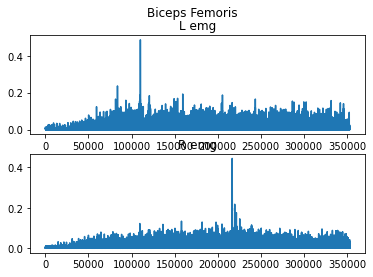

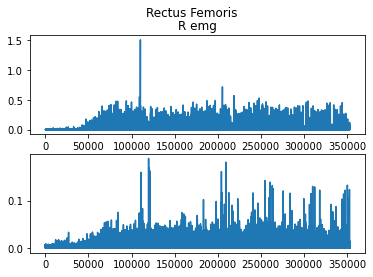

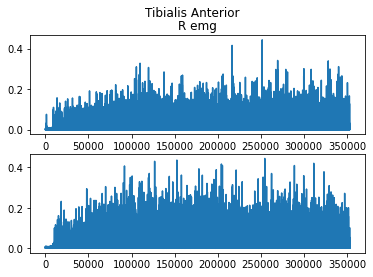

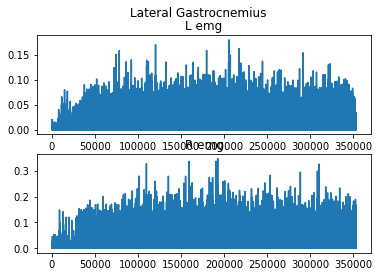

In [22]:
%matplotlib inline 
plt.figure()
plt.suptitle('Biceps Femoris') 
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,0])
plt.subplot(2,1,2)
plt.title('R emg')
plt.plot(matlabEMG['data_new'][:,1])




plt.figure()
plt.suptitle('Rectus Femoris') 
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,2])
plt.title('R emg')
plt.subplot(2,1,2)
plt.plot(matlabEMG['data_new'][:,3])

plt.figure()
plt.suptitle('Tibialis Anterior')
plt.subplot(2,1,1)
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,4])
plt.title('R emg')
plt.subplot(2,1,2)
plt.plot(matlabEMG['data_new'][:,5])

plt.figure()
plt.suptitle('Lateral Gastrocnemius')
plt.subplot(2,1,1) 
plt.title('L emg')
plt.plot(matlabEMG['data_new'][:,6])
plt.subplot(2,1,2)
plt.title('R emg')
plt.plot(matlabEMG['data_new'][:,7])

(40.0, 100.0)

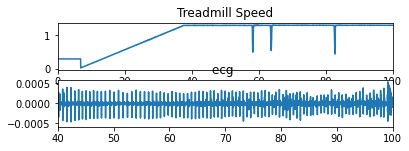

In [23]:
i = 0 #67410
f = 134820
ii= 17500
ff= 32500

num_figures = 4
plt.figure()
plt.subplot(num_figures,1,1)
plt.title('Treadmill Speed')
plt.plot(treadmill_data.Time, treadmill_data.Speed)
plt.xlim(0,100)
  

plt.subplot(num_figures,1,2)
plt.title('ecg ')
plt.plot(nw1.time, nw1.ecg)
plt.xlim(40,100)
  




In [24]:
scale

[15.0,
 20.0413612565445,
 25.082722513089003,
 30.124083769633508,
 35.165445026178006,
 40.20680628272251,
 45.248167539267016,
 50.28952879581152,
 55.33089005235602,
 60.37225130890052,
 65.41361256544502,
 70.45497382198953,
 75.49633507853403,
 80.53769633507854,
 85.57905759162304,
 90.62041884816755,
 95.66178010471204,
 100.70314136125654,
 105.74450261780105,
 110.78586387434555]

(0.0, 160.0)

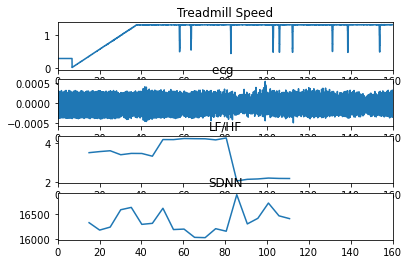

In [25]:
i = 0 #67410
f = 134820
ii= 17500
ff= 32500

num_figures = 4
plt.figure()
plt.subplot(num_figures,1,1)
plt.title('Treadmill Speed')
plt.plot(treadmill_data.Time, treadmill_data.Speed)
plt.xlim(0,160)
  

plt.subplot(num_figures,1,2)
plt.title('ecg ')
plt.plot(nw1.time, nw1.ecg)
plt.xlim(0,160)
  
plt.subplot(num_figures,1,3)
plt.title('LF/HF')
scale = [15+i[0]/1910 for i in intervals[0:-1]]
#plt.plot(lf_hf_store,'*')
plt.plot(scale, lf_hf_store)
plt.xlim(0,160)

plt.subplot(num_figures,1,4)
plt.title('SDNN')
plt.plot(scale, sdnn_store)
plt.xlim(0,160)
#plt.ylim(2500, 3500)



In [26]:
sdnn_store

[16322.512345150326,
 16176.512420568344,
 16235.673198032493,
 16578.640197854507,
 16625.102118613315,
 16289.866042996346,
 16309.975173239882,
 16607.941230475575,
 16187.061955664172,
 16196.231004789863,
 16032.746283707946,
 16027.003256959297,
 16204.448857479763,
 16154.020383856954,
 16876.6340060933,
 16298.439973537526,
 16409.39797728521,
 16710.943145322857,
 16458.479216405867,
 16403.00908725268]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
scale = [i[0]/1920 for i in intervals]

In [28]:
fNIRS

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,306,3,4,1,-0.6597,0.03918,-1.0590,-0.21750,-0.139,0.05466,...,-0.5010,-0.2153,-1.0980,-0.20580,-0.9524,-0.02956,-0.6850,-0.01828,-0.9026,-0.1797
1,306,3,4,1,-0.6648,0.04342,-1.0580,-0.18750,-0.1856,0.07302,...,-0.4996,-0.2094,-1.0240,-0.17240,-0.9314,-0.02961,-0.6501,-0.00063,-0.8840,-0.1679
2,306,3,4,1,-0.6463,0.04882,-1.0270,-0.15550,-0.2219,0.0873,...,-0.4824,-0.1981,-0.9266,-0.13640,-0.8823,-0.02859,-0.5990,0.01317,-0.8403,-0.1530
3,306,3,4,1,-0.6045,0.05347,-0.9630,-0.12340,-0.2411,0.09484,...,-0.4510,-0.1827,-0.8112,-0.09914,-0.8083,-0.02627,-0.5341,0.02349,-0.7731,-0.1360
4,306,3,4,1,-0.541,0.05605,-0.8687,-0.09241,-0.2374,0.0934,...,-0.4069,-0.1641,-0.6826,-0.06214,-0.7129,-0.02261,-0.4582,0.03089,-0.6850,-0.1173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,306,3,4,10,-50.99,36.16,-0.1723,-0.22980,-2.51,10.01,...,-1.0270,0.3642,-0.4002,0.11500,-0.9322,0.57960,-0.9778,0.52070,-0.6363,0.3541
3361,306,3,4,10,-60.51,46.1,-0.2448,-0.18140,-3.603,10.79,...,-1.0520,0.3694,-0.4427,0.11670,-0.9339,0.59900,-0.9292,0.59340,-0.6372,0.3663
3362,306,3,4,10,-69.18,56.67,-0.3282,-0.13000,-4.598,11.51,...,-1.0890,0.3697,-0.4878,0.12420,-0.9468,0.62140,-0.8770,0.68220,-0.6479,0.3813
3363,306,3,4,10,-75.36,65.23,-0.4154,-0.07903,-5.435,12.09,...,-1.1360,0.3658,-0.5309,0.13850,-0.9688,0.64620,-0.8246,0.78220,-0.6666,0.3987


In [29]:
 fnirs_trial1 = fNIRS[fNIRS['4']==1]

In [30]:
fNIRS[fNIRS['4']==1]['5']

0      -0.6597
1      -0.6648
2      -0.6463
3      -0.6045
4       -0.541
        ...   
313       12.9
314      13.38
315      12.41
316      10.56
317      8.328
Name: 5, Length: 318, dtype: object